In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Input, Flatten, Dense, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator


In [6]:
import os
dataset_path = r"C:\Users\Sreek\input\drowsiness-dataset\train"
labels = os.listdir(dataset_path)
print(labels)

['Closed', 'no_yawn', 'Open', 'yawn']


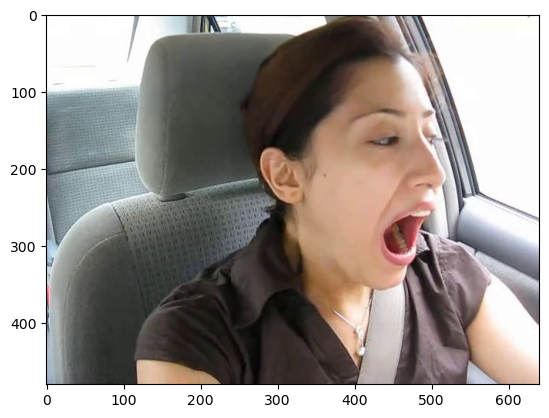

In [9]:
import matplotlib.pyplot as plt

image_path = r"C:\Users\Sreek\input\drowsiness-dataset\train\yawn\3.jpg"

image = plt.imread(image_path)
plt.imshow(image)
plt.show()


In [10]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [11]:
train_data = train_data_gen.flow_from_directory(r"C:\Users\Sreek\input\drowsiness-dataset\train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [12]:
validation_data = train_data_gen.flow_from_directory(r"C:\Users\Sreek\input\drowsiness-dataset\train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [24]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [25]:
test_data = test_data_gen.flow_from_directory(r"C:\Users\Sreek\input\drowsiness-dataset\train",target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [15]:
train_data

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential()

# Add Convolutional layers
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(80, 80, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")


In [18]:
model.build(input_shape=(80, 80, 3))

In [19]:


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

In [20]:
validation_steps = len(test_data)
validation_steps

363

In [153]:
hist = model.fit(train_data, epochs=55, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/55
291/291 [==============================] - 116s 397ms/step - loss: 0.0141 - accuracy: 0.9940 - val_loss: 0.1846 - val_accuracy: 0.9769
Epoch 2/55
291/291 [==============================] - 63s 216ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.2853 - val_accuracy: 0.9700
Epoch 3/55
291/291 [==============================] - 63s 216ms/step - loss: 0.0200 - accuracy: 0.9948 - val_loss: 0.1535 - val_accuracy: 0.9803
Epoch 4/55
291/291 [==============================] - 64s 221ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.1616 - val_accuracy: 0.9803
Epoch 5/55
291/291 [==============================] - 63s 217ms/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.1415 - val_accuracy: 0.9803
Epoch 6/55
291/291 [==============================] - 56s 192ms/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.1198 - val_accuracy: 0.9824
Epoch 7/55
291/291 [==============================] - 46s 160ms/step - loss: 0.0107 - accuracy: 0.9961 - val_loss: 0.1703 - val_a

In [175]:
model.save("drowsiness_model_1_55.keras")


In [176]:
model.save("drowsiness_model_1_55.model")

INFO:tensorflow:Assets written to: drowsiness_model_1_55.model\assets


INFO:tensorflow:Assets written to: drowsiness_model_1_55.model\assets


In [177]:
from keras.models import load_model
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np

In [178]:
model = load_model('drowsiness_model_1_55.keras')

In [171]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

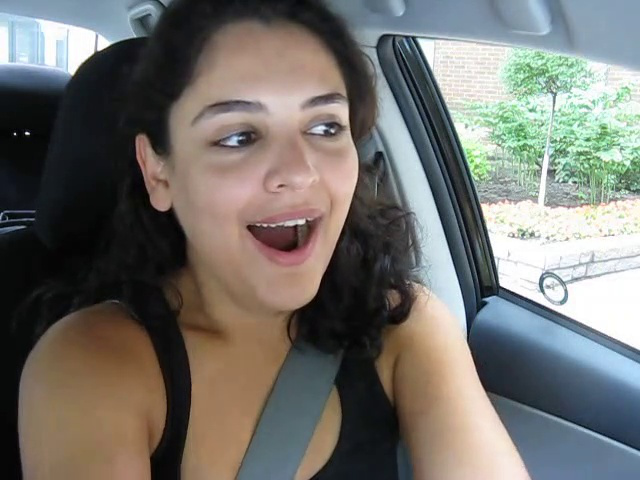

In [152]:
Image.open(r"C:\Users\Sreek\input\drowsiness-dataset\train\yawn\53.jpg")

In [76]:
image_size = (80, 80)

In [143]:
img = Image.open(r"C:\Users\Sreek\input\drowsiness-dataset\train\yawn\53.jpg").resize(image_size)

In [144]:
img = np.array(img)/255.0

In [145]:
img.shape

(80, 80, 3)

In [146]:
result = model.predict(img[np.newaxis, ...])

1/1 [==============================] - 0s 43ms/step


In [147]:
result.shape

(1, 4)

In [148]:
result

array([[1.7765946e-12, 3.4647630e-12, 7.4878693e-07, 9.9999928e-01]],
      dtype=float32)

In [149]:

predicted_label_index = np.argmax(result)

In [ ]:
predicted_label_index = np.argmax(result)
if predicted_label_index == 0:
    print('Closed eyes')
elif predicted_label_index == 1:
    print('No Yawn Detected')
elif predicted_label_index == 2:
    print('Open eyes')
elif predicted_label_index == 3:
    print('Yawn Detected')


In [151]:
predicted_label_index = np.argmax(result)

if (predicted_label_index==0) & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==3):
    print('Drowsiness Detected')

elif predicted_label_index==2 & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==1) & (predicted_label_index==2):
    print('No Drowsiness Detected')
    
elif predicted_label_index==1:
    print('No Drowsiness Detected')
    
elif predicted_label_index==2:
    print('No Drowsiness Detected')
    

Drowsiness Detected


In [197]:
import cv2
import numpy as np
from keras.models import load_model

cascade_classifier = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
model = load_model('drowsiness_model_1_55.keras')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret or frame is None:
        print("Error: Failed to capture frame")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Face detection
    detections = cascade_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(detections) > 0:
        for (x, y, w, h) in detections:
            face_roi = gray[y:y + h, x:x + w]  
            face_roi = cv2.resize(face_roi, (80, 80)) 
            face_roi_rgb = cv2.merge([face_roi] * 3) 
            face_roi_input = np.expand_dims(face_roi_rgb, axis=0)  
            
            result = model.predict(face_roi_input)
            predicted_label_index = np.argmax(result)

           
            if predicted_label_index == 0 and predicted_label_index == 3:
                cv2.putText(frame, 'Drowsiness Detected', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            elif predicted_label_index == 3:
                cv2.putText(frame, 'Drowsiness Detected', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            elif predicted_label_index == 2 and predicted_label_index == 3:
                cv2.putText(frame, 'Drowsiness Detected', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            elif predicted_label_index == 1 and predicted_label_index == 2:
                cv2.putText(frame, 'No Drowsiness Detected', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            elif predicted_label_index == 1:
                cv2.putText(frame, 'No Drowsiness Detected', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            elif predicted_label_index == 2:
                cv2.putText(frame, 'No Drowsiness Detected', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

            # Rest of your code for displaying predictions and rectangles...

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()


Error: Failed to capture frame
